In [ ]:
# "Sanaz Hosseini"- University of North Carolina at Charlotte
# Introduction to Machine Learning Class - Instructor: Prof. Hamed Tabkhi
# Support Vector Machine, Support Vector Regression, & Kernelization
# Homework 4

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as  plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [133]:
housing=pd.read_csv('Housing.csv')
housing.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [134]:
housing.mainroad = housing.mainroad.map(dict(yes=1,no=0))
housing.guestroom = housing.guestroom.map(dict(yes=1,no=0))
housing.basement = housing.basement.map(dict(yes=1,no=0))
housing.hotwaterheating = housing.hotwaterheating.map(dict(yes=1,no=0))
housing.airconditioning = housing.airconditioning.map(dict(yes=1,no=0))
housing.prefarea = housing.prefarea.map(dict(yes=1,no=0))

housing.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [135]:
housing.shape

(545, 13)

In [136]:
X = housing.iloc[:, 1:12].values
X.shape

(545, 11)

In [137]:
Y = housing.iloc[:, 0].values
Y.shape

(545,)

In [138]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
Y =Y.reshape(-1,1)
Y.shape

(545, 1)

In [139]:
Y_scaled= scaler.fit_transform(Y)
Y_scaled.shape

(545, 1)

# Support Vector Machine, using "rbf" kernel and PCA:

In [150]:
MSE = np.zeros(12)

for k in range(1,12):  
    pca = PCA(n_components = k)
    principalComponents = pca.fit_transform(X)
    
    X_train, X_test, Y_train, Y_test = train_test_split(principalComponents, Y_scaled, test_size = 0.2, random_state = 0)
    
    svr = SVR(kernel='rbf').fit(X_train, Y_train.ravel())
    yfit = svr.predict(X_test)
    score = svr.score(X_train, Y_train)
    MSE[k] = mean_squared_error(Y_test, yfit)

    #print("R_squared:", score)
    print (f"n_component = {k}")
    print("MSE:", MSE[k])
    print("\n")

n_component = 1
MSE: 0.37040277608000594


n_component = 2
MSE: 0.3594273329588866


n_component = 3
MSE: 0.32288754128708863


n_component = 4
MSE: 0.3164302646297005


n_component = 5
MSE: 0.32943023788456605


n_component = 6
MSE: 0.3258023269491626


n_component = 7
MSE: 0.32171772917773456


n_component = 8
MSE: 0.32767505835284194


n_component = 9
MSE: 0.34960168143027126


n_component = 10
MSE: 0.3499788045877954


n_component = 11
MSE: 0.348006436436167




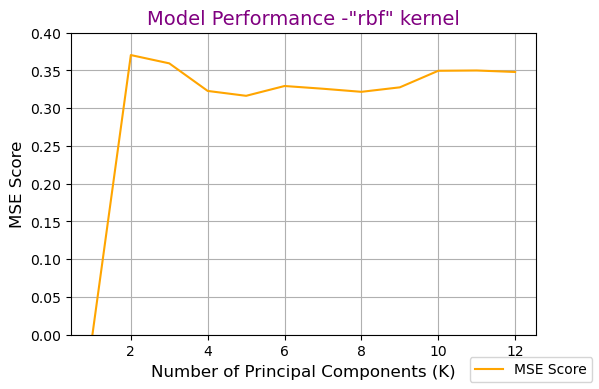

In [151]:
xaxis = range(1,13)
fig = plt.figure(dpi=100)
plt.ylim([0, 0.4])
plt.title('Model Performance -"rbf" kernel', fontsize = 14, color = 'purple')
plt.xlabel("Number of Principal Components (K)", fontsize = 12)
plt.ylabel("MSE Score", fontsize = 12)
plt.plot(xaxis, MSE, label="MSE Score", color = 'orange') 
fig.legend(loc = "lower right")
plt.grid()

# Support Vector Machine, using "linear" kernel and PCA:

In [152]:
for k in range(1,12):  
    pca = PCA(n_components = k)
    principalComponents = pca.fit_transform(X)
    
    X_train, X_test, Y_train, Y_test = train_test_split(principalComponents, Y_scaled, test_size = 0.2, random_state = 0)
    
    svr = SVR(kernel='linear').fit(X_train, Y_train.ravel())
    yfit = svr.predict(X_test)
    score = svr.score(X_train, Y_train)
    MSE[k] = mean_squared_error(Y_test, yfit)

    #print("R_squared:", score)
    print (f"n_component = {k}")
    print("MSE:", MSE[k])
    print("\n")

n_component = 1
MSE: 0.28606110203017626


n_component = 2
MSE: 0.2807231707485942


n_component = 3
MSE: 0.27991312867077994


n_component = 4
MSE: 0.2792874543184126


n_component = 5
MSE: 0.28813713940166175


n_component = 6
MSE: 0.28975001030014125


n_component = 7
MSE: 0.30407870454167796


n_component = 8
MSE: 0.3012524586324776


n_component = 9
MSE: 0.2870638035450702


n_component = 10
MSE: 0.28772432580319446


n_component = 11
MSE: 0.27130339592234626




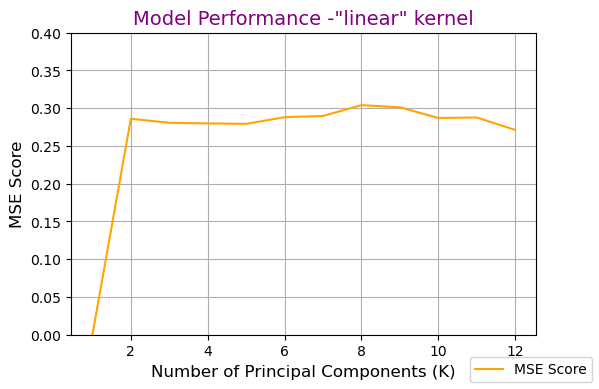

In [153]:
xaxis = range(1,13)
fig = plt.figure(dpi=100)
plt.ylim([0, 0.4])
plt.title('Model Performance -"linear" kernel', fontsize = 14, color = 'purple')
plt.xlabel("Number of Principal Components (K)", fontsize = 12)
plt.ylabel("MSE Score", fontsize = 12)
plt.plot(xaxis, MSE, label="MSE Score", color = 'orange') 
fig.legend(loc = "lower right")
plt.grid()

# Support Vector Machine, using "sigmoid" kernel and PCA:

In [154]:
for k in range(1,12):  
    pca = PCA(n_components = k)
    principalComponents = pca.fit_transform(X)
    
    X_train, X_test, Y_train, Y_test = train_test_split(principalComponents, Y_scaled, test_size = 0.2, random_state = 0)
    
    svr = SVR(kernel='sigmoid').fit(X_train, Y_train.ravel())
    yfit = svr.predict(X_test)
    score = svr.score(X_train, Y_train)
    MSE[k] = mean_squared_error(Y_test, yfit)

    #print("R_squared:", score)
    print (f"n_component = {k}")
    print("MSE:", MSE[k])
    print("\n")

n_component = 1
MSE: 341.1569136038755


n_component = 2
MSE: 108.87894281148957


n_component = 3
MSE: 41.429350566944265


n_component = 4
MSE: 21.704238575225794


n_component = 5
MSE: 20.496533039964493


n_component = 6
MSE: 14.16849405194977


n_component = 7
MSE: 8.532233065517875


n_component = 8
MSE: 5.215687694642826


n_component = 9
MSE: 4.299875330696719


n_component = 10
MSE: 3.1565236652600794


n_component = 11
MSE: 3.97067814115056




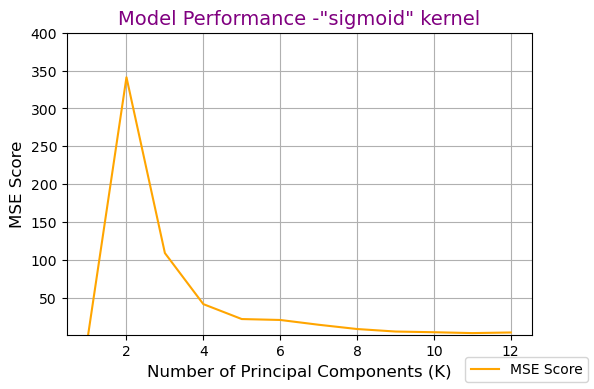

In [155]:
xaxis = range(1,13)
fig = plt.figure(dpi=100)
plt.ylim([1, 400])
plt.title('Model Performance -"sigmoid" kernel', fontsize = 14, color = 'purple')
plt.xlabel("Number of Principal Components (K)", fontsize = 12)
plt.ylabel("MSE Score", fontsize = 12)
plt.plot(xaxis, MSE, label="MSE Score", color = 'orange') 
fig.legend(loc = "lower right")
plt.grid()

# Support Vector Machine, using "poly" kernel and PCA:

In [156]:
for k in range(1,12):  
    pca = PCA(n_components = k)
    principalComponents = pca.fit_transform(X)
    
    X_train, X_test, Y_train, Y_test = train_test_split(principalComponents, Y_scaled, test_size = 0.2, random_state = 0)
    
    svr = SVR(kernel='poly').fit(X_train, Y_train.ravel())
    yfit = svr.predict(X_test)
    score = svr.score(X_train, Y_train)
    MSE[k] = mean_squared_error(Y_test, yfit)

    #print("R_squared:", score)
    print (f"n_component = {k}")
    print("MSE:", MSE[k])
    print("\n")

n_component = 1
MSE: 0.8925037334984854


n_component = 2
MSE: 1.0402971597664878


n_component = 3
MSE: 0.8852541233746665


n_component = 4
MSE: 0.5732513385981153


n_component = 5
MSE: 1.2251585077908804


n_component = 6
MSE: 0.6917786055073335


n_component = 7
MSE: 0.6332464430613309


n_component = 8
MSE: 0.5187568048172696


n_component = 9
MSE: 0.8998315158675444


n_component = 10
MSE: 0.805327174381117


n_component = 11
MSE: 0.5273628043949761




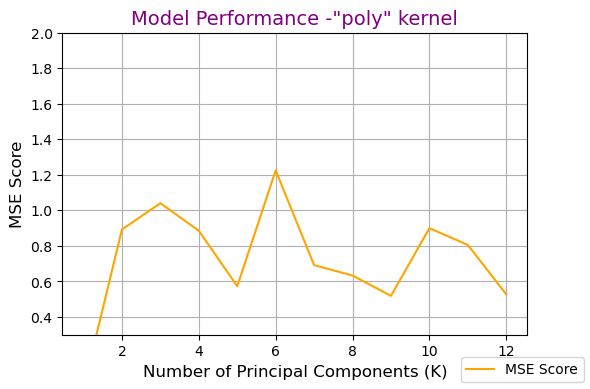

In [157]:
xaxis = range(1,13)
fig = plt.figure(dpi=100)
plt.ylim([0.3, 2])
plt.title('Model Performance -"poly" kernel', fontsize = 14, color = 'purple')
plt.xlabel("Number of Principal Components (K)", fontsize = 12)
plt.ylabel("MSE Score", fontsize = 12)
plt.plot(xaxis, MSE, label="MSE Score", color = 'orange') 
fig.legend(loc = "lower right")
plt.grid()

# Support Vector Machine, using "precomputed" kernel and PCA:

In [158]:
for k in range(1,12):  
    pca = PCA(n_components = k)
    principalComponents = pca.fit_transform(X)
    
    X_train, X_test, Y_train, Y_test = train_test_split(principalComponents, Y_scaled, test_size = 0.2, random_state = 0)
    
    kernel_train=np.dot(X_train, X_train.T)
    svr = SVR(kernel='precomputed').fit(kernel_train, Y_train.ravel())
    kernel_test=np.dot(X_test, X_train.T)   
    yfit = svr.predict(kernel_test)

    score = svr.score(kernel_train, Y_train)
    MSE[k] = mean_squared_error(Y_test, yfit)    

    #print("R_squared:", score)
    print (f"n_component = {k}")
    print("MSE:", MSE[k])
    print("\n")

n_component = 1
MSE: 0.28581090171434476


n_component = 2
MSE: 0.28072317074859077


n_component = 3
MSE: 0.2799689101146719


n_component = 4
MSE: 0.27928745431720237


n_component = 5
MSE: 0.28813713940167346


n_component = 6
MSE: 0.2897500103333584


n_component = 7
MSE: 0.3040787045418627


n_component = 8
MSE: 0.30125245863243044


n_component = 9
MSE: 0.2870638035450643


n_component = 10
MSE: 0.28772432580319146


n_component = 11
MSE: 0.2713033959223518




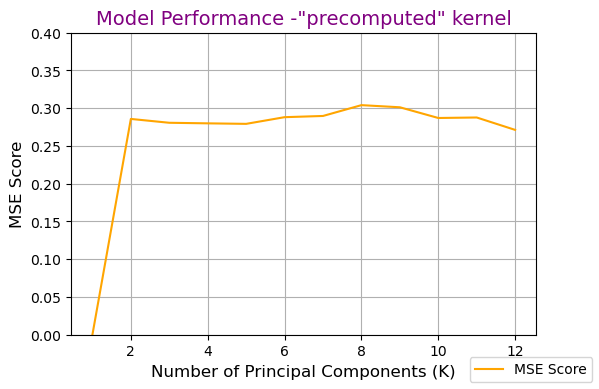

In [159]:
xaxis = range(1,13)
fig = plt.figure(dpi=100)
plt.ylim([0, 0.4])
plt.title('Model Performance -"precomputed" kernel', fontsize = 14, color = 'purple')
plt.xlabel("Number of Principal Components (K)", fontsize = 12)
plt.ylabel("MSE Score", fontsize = 12)
plt.plot(xaxis, MSE, label="MSE Score", color = 'orange') 
fig.legend(loc = "lower right")
plt.grid()

# Normal linear Regression form Homework 1:

In [129]:
from sklearn.linear_model import LinearRegression

X_train, X_test, Y_train, Y_test = train_test_split(X, Y_scaled, test_size = 0.2, random_state = 0)
    
model = LinearRegression()
model.fit(X_train, Y_train.ravel())
yfit = model.predict(X_test)
score = model.score(X_train, Y_train)
MSE[k] = mean_squared_error(Y_test, yfit)

    
    #print("R_squared:", score)
#print (f"n_component = {k}")
print("MSE:", MSE[k])
print("\n")

MSE: 0.2772509555876622


